[  9.    9.8  10.   10.2  10.4  10.6  12. ]
cmap_origin = 0.0106885557999
1700
251
234
178
142
167
s = 0 real_x = 605 real_y = 29 arr_r = 1071 arr_c = 605
s = 0 real_x = 783 real_y = 30 arr_r = 1070 arr_c = 783
s = 0 real_x = 800 real_y = 31 arr_r = 1069 arr_c = 800
s = 0 real_x = 515 real_y = 32 arr_r = 1068 arr_c = 515
s = 0 real_x = 762 real_y = 30 arr_r = 1070 arr_c = 762
s = 0 real_x = 651 real_y = 32 arr_r = 1068 arr_c = 651
s = 0 real_x = 187 real_y = 34 arr_r = 1066 arr_c = 187
s = 0 real_x = 822 real_y = 34 arr_r = 1066 arr_c = 822
s = 0 real_x = 489 real_y = 33 arr_r = 1067 arr_c = 489
s = 0 real_x = 572 real_y = 36 arr_r = 1064 arr_c = 572
s = 0 real_x = 611 real_y = 35 arr_r = 1065 arr_c = 611
s = 0 real_x = 186 real_y = 36 arr_r = 1064 arr_c = 186
s = 0 real_x = 156 real_y = 36 arr_r = 1064 arr_c = 156
s = 0 real_x = 625 real_y = 38 arr_r = 1062 arr_c = 625
s = 0 real_x = 208 real_y = 38 arr_r = 1062 arr_c = 208
s = 0 real_x = 778 real_y = 37 arr_r = 1063 arr_c = 778
s = 0

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:286: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:287: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


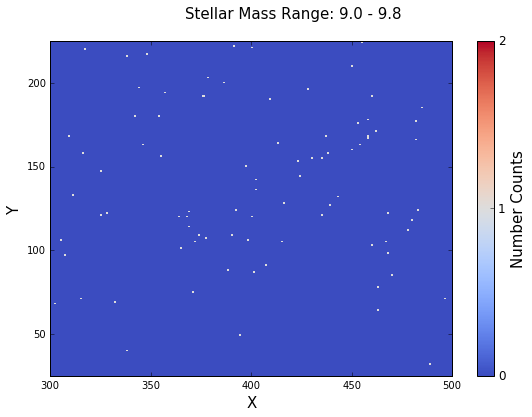

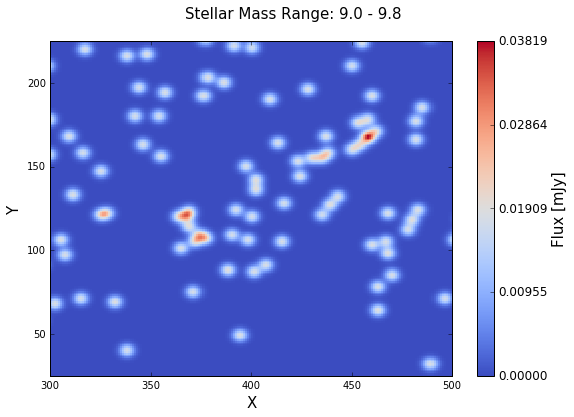

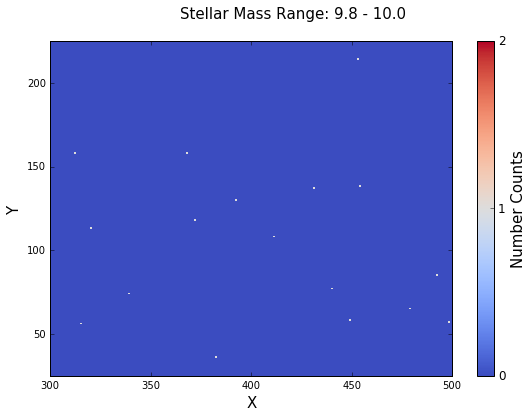

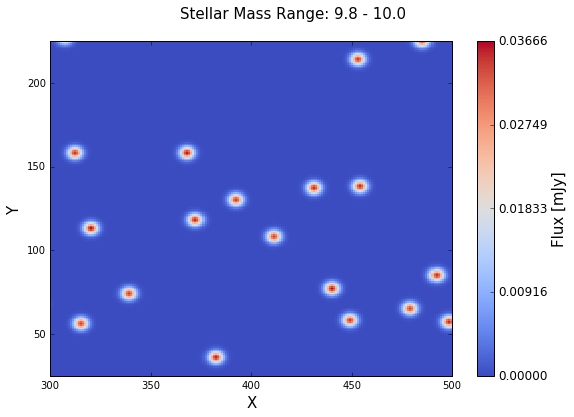

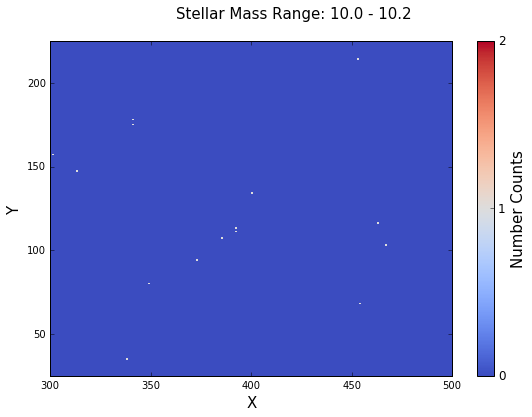

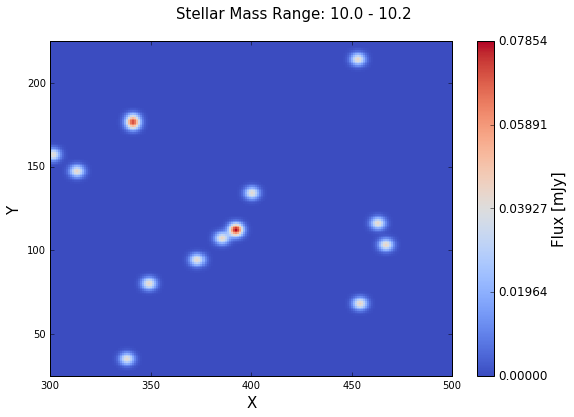

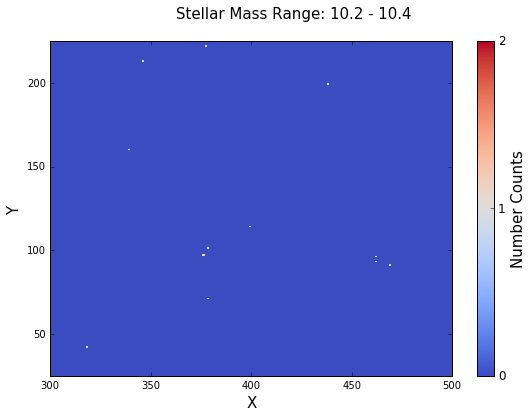

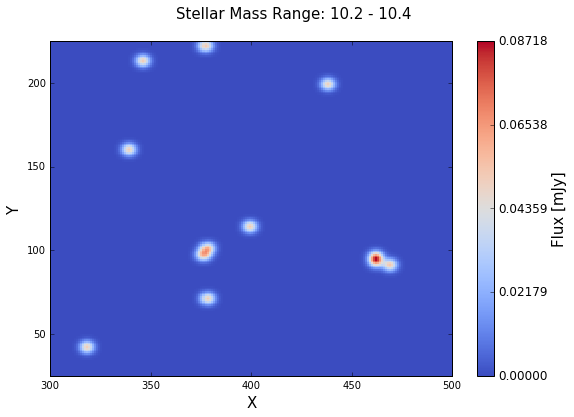

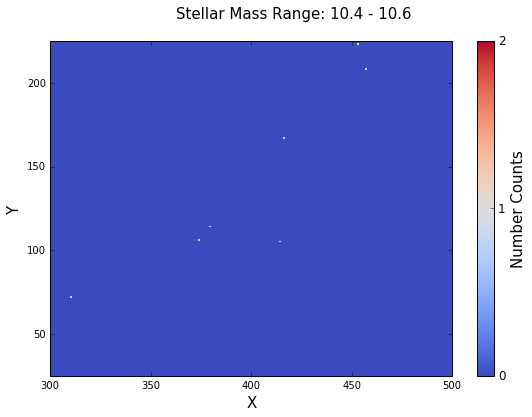

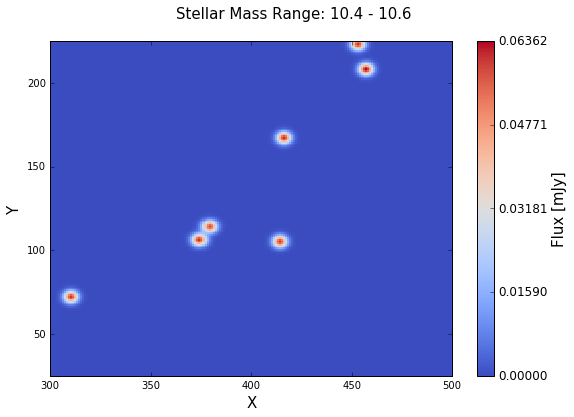

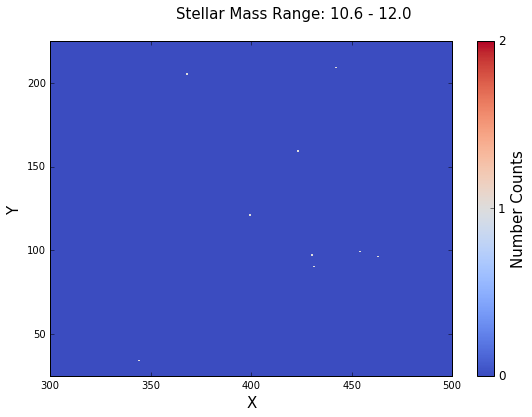

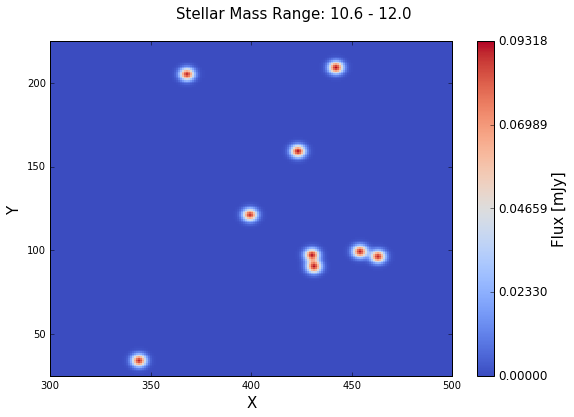

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:333: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


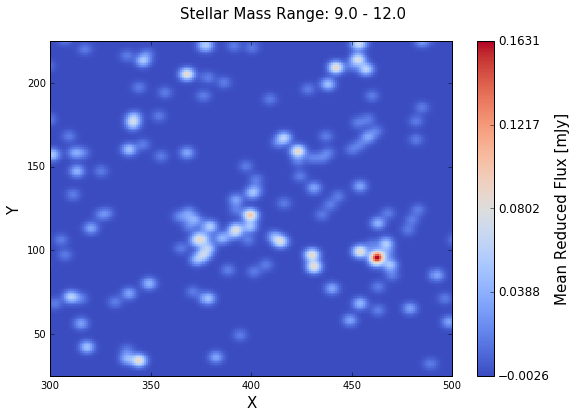

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:357: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


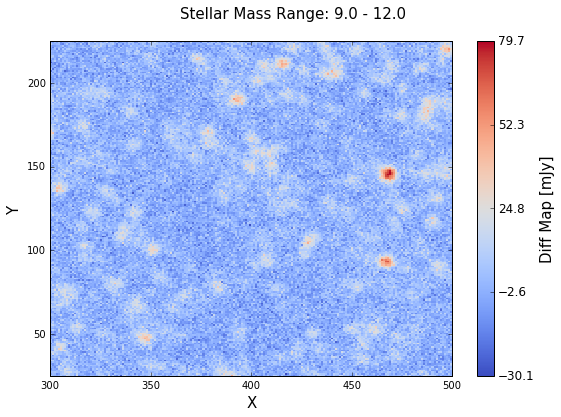

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:380: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


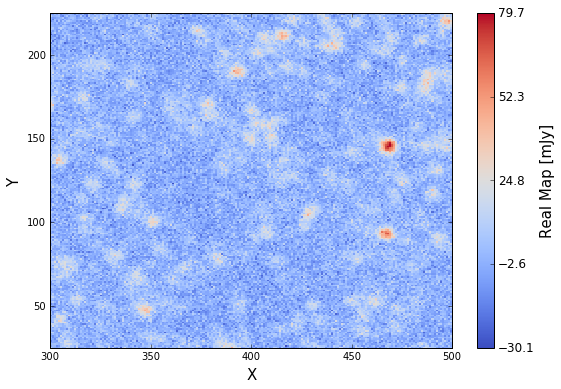

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:400: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


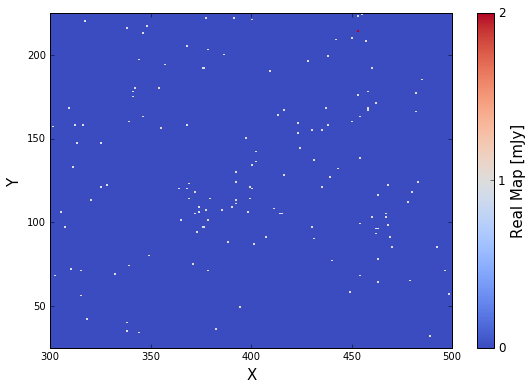

time_stacked = 2668


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:424: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:433: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


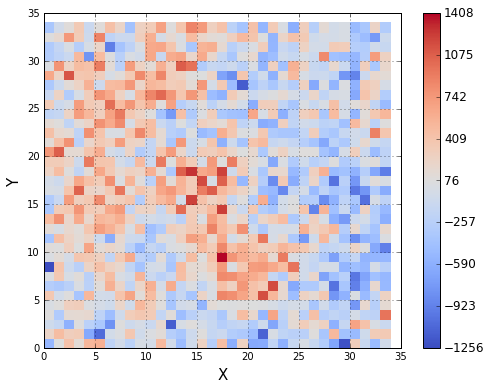

"\nLOGF_MEAN = np.empty(nlists)\nfor s in range(nlists):\n    F_MEAN = single_simple_flux_from_greybody(np.array([wavelength[0]]), Trf = 20., b = 2.0, Lrf = L_to_assign[s], zin = z_to_assign[s])\n    LOGF_MEAN[s] = np.log10(F_MEAN).flatten()[0]\nsigma_list = np.array([0.1,0.5,1.0])\n\ndef norm_distr(x,mean,sigma,norm):\n    temp = np.exp(-(x-mean)**2/sigma**2/2)\n    temp = 1./sigma/np.sqrt(2.*np.pi) * temp\n    temp = norm * temp\n    return temp\nnorm_distr = np.vectorize(norm_distr)\n\nfor s in range(nlists):\n    # s th stellar mass bin\n    plt.figure(figsize=(9,6))\n    y1_max = 0\n    plt.hold(True)\n    for pi in range(3):\n        #data = np.asarray(stack_in_redshift_slices(sigma_list[pi],cmap,chd,cube,fwhm=efwhm[0],cnoise=cnoise))\n        data = stack_in_redshift_slices(sigma_list[pi],cmap,chd,cube,fwhm=efwhm[0],cnoise=cnoise)\n        data = [np.log10(data[i]) for i in range(0,len(data))]\n        n1_max = max(np.histogram(data[s],bins=10)[0])\n        bs = abs(np.histogram

In [210]:
import os
import numpy as np
import pdb
from astropy.io import fits
from astropy.wcs import WCS
import pylab as plt
from viero_quick_stack import viero_quick_stack
from shift import shift_twod
from VieroLibrary.readcol import readcol
from VieroLibrary.dist_idl import dist_idl
from VieroLibrary.invert_sed import single_simple_flux_from_greybody
from lmfit import Parameters, minimize, fit_report
from smoothmap import smoothmap
from gauss_kern import gauss_kern

%matplotlib inline

# Seed random numbers
rand = np.random.RandomState(42)

#map_path='/Users/marco/Documents/Publications/my_old_publications/k_band_stacking_paper/lorenzo_code/SPIRE/stacking_code/test_data/'
map_path='/Users/guochaosun/Desktop/Caltech_OBSCOS/CO_Tracer/SIMSTACK_Py/test_runs/'
catalog_path=map_path
nlists=6
catalog_names=[]
for a in range(nlists):
    #catalog_names.append(catalog_path+'test_cat_'+str(a)+'.csv')
    catalog_names.append(catalog_path+'mycat'+str(a)+'.csv')

log_mass_list = np.array([9.0,9.8,10.0,10.2,10.4,10.6,12.0])
print log_mass_list
mass_list = 10**np.array([9.4,9.9,10.1,10.3,10.5,11.3])
map_suffix=['PSW','PMW','PLW']
wavelength=[250,350,500]

map_files=[]
noise_files=[]
for m in map_suffix: map_files.append(map_path+'uds_cutout_flux_' + m + '.fits')
for m in map_suffix: noise_files.append(map_path+'uds_cutout_noise_' + m + '.fits')



fwhm  = np.array([18.1, 25.2, 36.6])
efwhm = np.array([17.6, 23.9, 35.2])

map_names = map_files
noise_map_names = noise_files

cmap, chd = fits.getdata(map_names[0], 0, header = True)
print 'cmap_origin =', cmap[0,0]
cnoise, nhd = fits.getdata(noise_map_names[0], 0, header = True)

#PUT DATA INTO CUBE
nlists = len(catalog_names)
n_sources_max=90000l
nsources = 0 # initialize a counter
cube = np.zeros([n_sources_max, nlists, 2]) # nsources by nlis/nts by 2 for RA/DEC
for i in range(nlists): 
    list_name = catalog_names[i]
    if os.path.getsize(list_name) > 0:
        ra, dec = readcol(list_name,fsep=',',twod=False)
        nsources_list=len(ra)
        print nsources_list
        if nsources_list > n_sources_max: 
            print 'too many sources in catalog: use N_SOURCES_MAX flag'
            break
        if nsources_list > 0:
            cube[0:nsources_list,i,0]=ra
            cube[0:nsources_list,i,1]=dec
        if nsources_list > nsources: 
            nsources=nsources_list

#cube=cube[0:nsources-1,:,:] # Crop it down to the length of longest list
cube=cube[0:nsources,:,:] # Crop it down to the length of longest list
#print cube

def flux_disturbed(f_mean,sigma):
    _logf_mean = np.log10(f_mean)
    dim = f_mean.shape
    new_logf = rand.normal(_logf_mean,sigma,dim)
    return 10**new_logf

def circle_mask(pixmap,radius_in,pixres):
    ''' Makes a 2D circular image of zeros and ones'''

    radius=radius_in/pixres
    xy = np.shape(pixmap)
    xx = xy[0]
    yy = xy[1]
    beforex = np.log2(xx)
    beforey = np.log2(yy)
    if beforex != beforey:
        if beforex > beforey:
            before = beforex 
        else:
            before = beforey
    else: before = beforey
    l2 = np.ceil(before)
    pad_side = 2.0 ** l2
    outmap = np.zeros([pad_side, pad_side])
    outmap[:xx,:yy] = pixmap

    dist_array = shift_twod(dist_idl(pad_side, pad_side), pad_side/2, pad_side/2)
    circ = np.zeros([pad_side, pad_side])
    ind_one = np.where(dist_array <= radius)
    circ[ind_one] = 1.
    mask  = np.real( np.fft.ifft2( np.fft.fft2(circ) *
            np.fft.fft2(outmap)) 
            ) * pad_side * pad_side
    mask = np.round(mask)
    ind_holes = np.where(mask >= 1.0)
    mask = mask * 0.
    mask[ind_holes] = 1.
    maskout = shift_twod(mask, pad_side/2, pad_side/2)

    return maskout[:xx,:yy]

def L_M_z(M,z):
    ''' Take two 1D arrays and return a 1D array '''
    ans = np.empty(M.shape[0])
    for i in range(M.shape[0]):
        _logM = np.log10(M[i])
        _z = z[i]
        y_matrix = np.array([[-7.248,3.160,-0.137],[-1.634,0.335,-0.009],[-7.758,1.374,-0.062]])
        M_vector = np.array([_logM**0,_logM**1,_logM**2]).T
        z_vector = np.array([_z**0,_z**1,_z**2]).T
        x_vector = np.dot(y_matrix,M_vector)
        _logL = np.dot(x_vector,z_vector)
        ans[i] = 10**_logL
    return ans

#mass_bins = np.array([9.0,10.0,11.0,12.0])
#z_bins = np.array([0.0,1.0,2.0,3.0,4.0])

#M_bin_meds = mass_bins[1::] - mass_bins[0:-1]
#z_bin_meds = z_bins[1::] - z_bins[0:-1]

from VieroLibrary.invert_sed import *
M_to_assign = mass_list
z_to_assign = 0.25*np.ones(nlists)
L_to_assign = L_M_z(M_to_assign,z_to_assign)

# print 'L_to_assign =', L_to_assign






def stack_in_redshift_slices(
  sigma,
  cmap, 
  hd, 
  layers_radec, 
  fwhm, 
  cnoise=None, 
  mask=None, 
  beam_area=None, 
  err_ss=None, 
  quiet=None):

    w = WCS(hd)
    #FIND SIZES OF MAP AND LISTS
    cms = np.shape(cmap)
    #print 'cms = ', cms
    zeromask = np.zeros(cms)
    
    size_cube = np.shape(layers_radec)
    nsrcmax = size_cube[0]
    nlists = int(size_cube[1])
    #print nsrcmax, nlists
    
    ind_map_zero = np.where(np.isnan(cmap))
    nzero = np.shape(ind_map_zero)[1]
    
    #print nzero 
    
    if np.sum(cnoise) == 0: cnoise=cmap*0.0 + 1.0
    
    pix=hd["CD2_2"]*3600.
    if pix == 0: pix=hd["CDELT2"]*3600.

    #[STEP 0] - Calibrate maps
    if beam_area != None:
        cmap=cmap*beam_area*1e6
        cnoise=noise*beam_area*1e6
    
    # STEP 1  - Make Layers Cube
    layers = np.zeros([nlists,cms[0],cms[1]])
    for s in range(nlists):
        ind_src = np.where(layers_radec[:,s,0] != 0)
    
        if np.shape(ind_src)[1] > 0:    
            ra = layers_radec[ind_src,s,0]
            dec = layers_radec[ind_src,s,1]
            #print 'ra = ', ra, 'dec = ', dec
            
            
        # CONVERT FROM RA/DEC to X/Y
        # DANGER!!  NOTICE THAT I FLIP X AND Y HERE!! 
        #ty,tx = w.wcs_world2pix(ra, dec, 0)# NOTICE I FLIPPED X AND Y AND NO LONGER TRANSPOSE!
        tx,ty = w.wcs_world2pix(ra, dec, 0)# NOTICE I FLIPPED X AND Y AND NO LONGER TRANSPOSE! 
        # CHECK FOR SOURCES THAT FALL OUTSIDE MAP
        ind_keep = np.where((tx[0] >= 0) & (tx[0] < cms[0]) & (ty[0] >= 0) & (ty[0] < cms[1]))    
        nt0 = np.shape(ind_keep)[1]
        # print 'nt0 = ', nt0
        real_x=np.floor(tx[0,ind_keep][0]).astype(int)
        real_y=np.floor(ty[0,ind_keep][0]).astype(int)
        
        # CHECK FOR SOURCES THAT FALL ON ZEROS MAP
        if nzero > 0:
            tally = np.zeros(nt0)
            for d in range(nt0):
                if cmap[real_x[d],real_y[d]] != 0: 
                    tally[d]=1.
            ind_nz=np.where(tally == 1)
            nt = np.shape(ind_nz)[1]
            real_x = real_x[ind_nz]
            real_y = real_y[ind_nz]
        else: nt = nt0
        
        arr_r = cms[0] - real_y
        arr_c = real_x
        for ni in range(nt):
            print 's =', s, 'real_x =', real_x[ni], 'real_y =', real_y[ni], 'arr_r =', arr_r[ni], 'arr_c =', arr_c[ni]
            layers[s, arr_r[ni], arr_c[ni]]+=1.0
    
    one_zero_map = np.copy(layers)
    # Step 2  - Assign luminosities -> fluxes -> disturbed fluxed to the ones
    # Assign luminosities and then fluxes, L_to_assign in [Lsun]
    f_record = []
    for s in range(nlists):
        f_record_s = []
        wav_in = np.array([wavelength[0]])
        # Get the number of sources of this layer
        n_sources_s = sum(one_zero_map[s,:,:].flatten())
        # Get the maximum count of this layer
        N_max_s = max(one_zero_map[s,:,:].flatten()).astype(int)  
        # Make lists of flux and perturbed flux to insert with the size of the layer's total source count
        flux_si = single_simple_flux_from_greybody(wav_in, Trf = 20., b = 2.0, Lrf = L_to_assign[s], zin = z_to_assign[s])
        flux_s = flux_si * np.ones(n_sources_s)
        pflux_s = flux_disturbed(flux_s,sigma).flatten()
        for i in range(0,N_max_s):
            locs_in = np.where(one_zero_map[s,:,:]>=i+1)
            N_in = locs_in[0].shape[0]
            flux_in = pflux_s[0:N_in]
            # Trim if N_in < length of pflux_s list
            if N_in < pflux_s.shape[0]:
                pflux_s = pflux_s[N_in::]
            f_record_s.extend(flux_in.tolist())
            layers[s,:,:][locs_in] = flux_in
        
        f_record.append(f_record_s)
     
    
    # STEP 3  - Convolve Layers and put in pixels
    
    convolved_layers = np.zeros(layers.shape)
    kern = gauss_kern(fwhm, np.floor(fwhm * 10), pix)
    #print 'kern =', kern.shape
    #print 'pix =', pix
    for u in range(nlists):
        layer = layers[u,:,:] 
        #layer = np.transpose(layers[u,:,:]) ## DANGER!! Transpose NO LONGER required AFTER FLIPPING x and y!!!!!!!
        #tmap = gaussian_filter(layer, sig) 
        #tmap = smoothmap(layer, kern)
        convolved_layers[u,:,:] = smoothmap(layer, kern)
        #tmap -= np.mean(tmap[ind_fit])
    
    
    
    
    
    
    
    # Make some plots
    sample_l = 200
    # Here sample_c is the coords on real map
    sample_c = [400,125]
    X = np.linspace(sample_c[0]-sample_l/2,sample_c[0]+sample_l/2,sample_l+1)
    Y = np.linspace(sample_c[1]-sample_l/2,sample_c[1]+sample_l/2,sample_l+1)
    
    for s in range(nlists):

        #Z = np.sum(convolved_layers[0:s+1,Y[0]:Y[-1],X[0]:X[-1]], axis=0)
        Z1 = np.flipud(one_zero_map[s,cms[0]-Y[-1]:cms[0]-Y[0],X[0]:X[-1]])
        Z2 = np.flipud(convolved_layers[s,cms[0]-Y[-1]:cms[0]-Y[0],X[0]:X[-1]])

        barvs1 = np.linspace(0.0,2.0,3)

        plt.figure(figsize=(9,6))
        plt.pcolor(X, Y, Z1, cmap='coolwarm', vmin=0.0, vmax=2.0)

        plt.xlabel('X', fontsize=15)
        plt.ylabel('Y', fontsize=15)
        plt.xlim([min(X),max(X)])
        plt.ylim([min(Y),max(Y)])
        plt.suptitle('Stellar Mass Range: %.1f - %.1f' % (log_mass_list[s],log_mass_list[1+s]), fontsize=15)
        cb = plt.colorbar(ticks=barvs1)
        cb.ax.tick_params(labelsize=12)
        cb.set_label('Number Counts', fontsize=15)
        #plt.grid(True)
        #plt.savefig('one_zero_map_%d.png' % s)
        plt.show()
    
        
        barvs2 = np.linspace(min(Z2.flatten()),max(Z2.flatten()),5)

        plt.figure(figsize=(9,6))
        plt.pcolor(X, Y, Z2, cmap='coolwarm', vmin=min(Z2.flatten()), vmax=max(Z2.flatten()))
        
        plt.xlabel('X', fontsize=15)
        plt.ylabel('Y', fontsize=15)
        plt.xlim([min(X),max(X)])
        plt.ylim([min(Y),max(Y)])
        plt.suptitle('Stellar Mass Range: %.1f - %.1f' % (log_mass_list[s],log_mass_list[1+s]), fontsize=15)
        cb = plt.colorbar(ticks=barvs2)
        cb.ax.tick_params(labelsize=12)
        cb.set_label('Flux [mJy]', fontsize=15)
        #plt.grid(True)
        #plt.savefig('one_zero_map_%d.png' % s)
        plt.show()
        
        
        
    
    
    # Now the convolved_layers are in units of mJy. We can sum up different mass bins
    summed_layers = np.sum(convolved_layers, axis=0)
    summed_layers_mean_reduced = summed_layers - np.mean(summed_layers.flatten())


    Z3 = np.flipud(summed_layers_mean_reduced[cms[0]-Y[-1]:cms[0]-Y[0],X[0]:X[-1]])
    
    barvs3 = np.linspace(min(Z3.flatten()),max(Z3.flatten()),5)

    plt.figure(figsize=(9,6))
    plt.pcolor(X, Y, Z3, cmap='coolwarm', vmin=min(Z3.flatten()), vmax=max(Z3.flatten()))

    plt.xlabel('X', fontsize=15)
    plt.ylabel('Y', fontsize=15)
    plt.xlim([min(X),max(X)])
    plt.ylim([min(Y),max(Y)])
    plt.suptitle('Stellar Mass Range: %.1f - %.1f' % (log_mass_list[0],log_mass_list[nlists]), fontsize=15)
    cb = plt.colorbar(ticks=barvs3)
    cb.ax.tick_params(labelsize=12)
    cb.set_label('Mean Reduced Flux [mJy]', fontsize=15)
    #plt.grid(True)
    plt.savefig('sample_mock_map.png')
    plt.show()
    
    
    
    cmap_mJy = cmap*1.0E3
    diff_map = cmap_mJy - summed_layers_mean_reduced

    Z4 = np.flipud(diff_map[cms[0]-Y[-1]:cms[0]-Y[0],X[0]:X[-1]])

    barvs4 = np.linspace(min(Z4.flatten()),max(Z4.flatten()),5)

    plt.figure(figsize=(9,6))
    plt.pcolor(X, Y, Z4, cmap='coolwarm', vmin=min(Z4.flatten()), vmax=max(Z4.flatten()))

    plt.xlabel('X', fontsize=15)
    plt.ylabel('Y', fontsize=15)
    plt.xlim([min(X),max(X)])
    plt.ylim([min(Y),max(Y)])
    plt.suptitle('Stellar Mass Range: %.1f - %.1f' % (log_mass_list[0],log_mass_list[nlists]), fontsize=15)
    cb = plt.colorbar(ticks=barvs4)
    cb.ax.tick_params(labelsize=12)
    cb.set_label('Diff Map [mJy]', fontsize=15)
    #plt.grid(True)
    plt.savefig('sample_diff_map.png')
    plt.show()
    
    
    
    
    
    Z5 = np.flipud(cmap_mJy[cms[0]-Y[-1]:cms[0]-Y[0],X[0]:X[-1]])

    barvs5 = np.linspace(min(Z5.flatten()),max(Z5.flatten()),5)

    plt.figure(figsize=(9,6))
    plt.pcolor(X, Y, Z5, cmap='coolwarm', vmin=min(Z5.flatten()), vmax=max(Z5.flatten()))

    plt.xlabel('X', fontsize=15)
    plt.ylabel('Y', fontsize=15)
    plt.xlim([min(X),max(X)])
    plt.ylim([min(Y),max(Y)])
    cb = plt.colorbar(ticks=barvs5)
    cb.ax.tick_params(labelsize=12)
    cb.set_label('Real Map [mJy]', fontsize=15)
    #plt.grid(True)
    plt.savefig('sample_real_map.png')
    plt.show()
    
    
    
    Z6 = np.flipud(np.sum(one_zero_map[0:nlists,cms[0]-Y[-1]:cms[0]-Y[0],X[0]:X[-1]],axis=0))
    
    barvs6 = np.linspace(0.0,2.0,3)

    plt.figure(figsize=(9,6))
    plt.pcolor(X, Y, Z6, cmap='coolwarm', vmin=0.0, vmax=2.0)

    plt.xlabel('X', fontsize=15)
    plt.ylabel('Y', fontsize=15)
    plt.xlim([min(X),max(X)])
    plt.ylim([min(Y),max(Y)])
    cb = plt.colorbar(ticks=barvs6)
    cb.ax.tick_params(labelsize=12)
    cb.set_label('Real Map [mJy]', fontsize=15)
    #plt.grid(True)
    plt.savefig('sample_one_zero_map.png')
    plt.show()
    
    
    loc_gals = np.where(np.sum(one_zero_map,axis=0)>=1.0)
    boxsize = np.floor(2.0*fwhm)
    thumbnail_x = loc_gals[0]
    thumbnail_y = loc_gals[1]
    n_thumbnails = thumbnail_x.shape[0]    
    thumbnail_tot = np.zeros((n_thumbnails,boxsize,boxsize))
    #print 'n_thumbnails =', n_thumbnails
    #print 'boxsize =', boxsize
    
    counter = 0
    for i in range(0,n_thumbnails):
        xlim = np.array([thumbnail_x[i]-boxsize/2, thumbnail_x[i]+boxsize/2])
        ylim = np.array([thumbnail_y[i]-boxsize/2, thumbnail_y[i]+boxsize/2])
        if np.all(xlim>=0) and np.all(ylim>=0):
            thumbnail = diff_map[xlim[0]:xlim[1],ylim[0]:ylim[1]]
            #print 'thumbnailshape =', thumbnail.shape
            thumbnail_tot[i,:,:] = thumbnail
            #print thumbnail.shape
            counter += 1
    
    print 'time_stacked =', counter
    
    
    
    Z = np.sum(thumbnail_tot, axis=0)
    X = np.arange(boxsize)
    Y = np.arange(boxsize)
    
    barvs = np.linspace(min(Z.flatten()),max(Z.flatten()),9)
    
    plt.figure(figsize=(8,6))
    plt.pcolor(X, Y, Z, cmap='coolwarm')#, vmin=0.0, vmax=4.0)

    #plt.xticks(X, np.round(X,1), fontsize=12)
    #plt.yticks(Y, np.round(Y,1), fontsize=12)
    plt.xlabel('X', fontsize=15)
    plt.ylabel('Y', fontsize=15)
    #plt.ylim([z_min,z_max])
    cb = plt.colorbar(ticks=barvs)
    cb.ax.tick_params(labelsize=12)
    #cb.set_label('Log Number Counts', fontsize=15)
    plt.grid(True)
    plt.show()
    
    
    return f_record
    #return np.asarray(logf_record)

    
    
stack_in_redshift_slices(0.01,cmap,chd,cube,fwhm=efwhm[0],cnoise=cnoise)
    
    
    
    
 
'''
LOGF_MEAN = np.empty(nlists)
for s in range(nlists):
    F_MEAN = single_simple_flux_from_greybody(np.array([wavelength[0]]), Trf = 20., b = 2.0, Lrf = L_to_assign[s], zin = z_to_assign[s])
    LOGF_MEAN[s] = np.log10(F_MEAN).flatten()[0]
sigma_list = np.array([0.1,0.5,1.0])

def norm_distr(x,mean,sigma,norm):
    temp = np.exp(-(x-mean)**2/sigma**2/2)
    temp = 1./sigma/np.sqrt(2.*np.pi) * temp
    temp = norm * temp
    return temp
norm_distr = np.vectorize(norm_distr)

for s in range(nlists):
    # s th stellar mass bin
    plt.figure(figsize=(9,6))
    y1_max = 0
    plt.hold(True)
    for pi in range(3):
        #data = np.asarray(stack_in_redshift_slices(sigma_list[pi],cmap,chd,cube,fwhm=efwhm[0],cnoise=cnoise))
        data = stack_in_redshift_slices(sigma_list[pi],cmap,chd,cube,fwhm=efwhm[0],cnoise=cnoise)
        data = [np.log10(data[i]) for i in range(0,len(data))]
        n1_max = max(np.histogram(data[s],bins=10)[0])
        bs = abs(np.histogram(data[s],bins=10)[1][1] - np.histogram(data[s],bins=10)[1][0])
        if y1_max < n1_max:
            y1_max = n1_max*1.1
        plt.hist(data[s], bins=10, facecolor='green', alpha=1./2**(pi+1))
        plt.ylim([0,y1_max])
        plt.xlabel('$\log_{10}(f_{\\nu}/[\mathrm{mJy}])$', fontsize=15)
        plt.ylabel('Galaxy Number Counts', fontsize=15)
        xpts = np.linspace(LOGF_MEAN[s]-5*bs,LOGF_MEAN[s]+5*bs,100)
        plt.plot(xpts,norm_distr(xpts,LOGF_MEAN[s],sigma_list[pi],bs*len(data[s])),'r--')
        uniparams = ' $(250\mu m,\ 0<z<0.5)$'
        ptitle = 'Stellar Mass Range: %.1f - %.1f' % (log_mass_list[s],log_mass_list[s+1])
        plt.suptitle(ptitle+uniparams, fontsize=16)
    plt.savefig('gal_distr_%d' % s)
    plt.show()

'''

